In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


spy = yf.download('^GSPC', auto_adjust=True)['Close']
years = list(set(spy.index.year))
ann = pd.DataFrame([spy.loc[spy.index.year==yy].tolist() for yy in years]).T
ann.columns = years
ann = (ann / ann.iloc[0])

days = len(ann[2022].dropna())

[*********************100%***********************]  1 of 1 completed


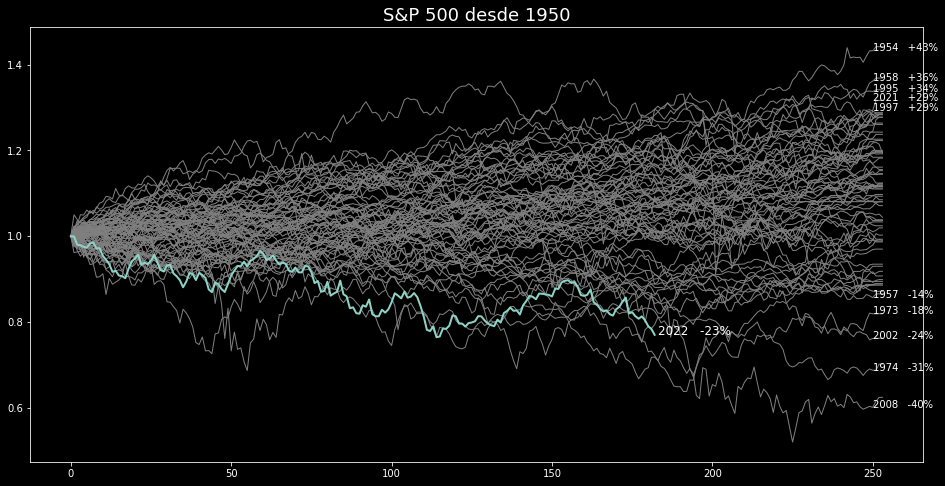

In [ ]:
ann = ann.interpolate()
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16,8))
ann.iloc[:,:-1].plot(ax=ax, lw=1, color='gray')
ax.get_legend().remove()
ax.plot(ann[2022].iloc[:days], lw=2)

yy_ord = list(ann.iloc[-1,:-1].sort_values(ascending=False).index.values)
head, tail = yy_ord[:5], yy_ord[-5:]

for yy in years:
    yy_coord = ann[yy].iloc[250]
    v = yy_coord - 1
    ch = '+' if yy_coord > 1 else ''
    s = f'{yy}   {ch}{v:.0%}'
    if (yy in head) | (yy in tail):
        if yy==2021:
            yy_coord += 0.025
        ax.annotate(s, xy=(250, yy_coord), xytext=(0,0), textcoords='offset points', fontsize=10)
    if (yy==2022):
        ax.annotate(s, xy=(days, yy_coord), xytext=(0,0), textcoords='offset points', fontsize=12)


ax.set_title('S&P 500 desde 1950', fontsize=18)
plt.show()